<a href="https://colab.research.google.com/github/Vanbk/Tensorflow/blob/master/Sofmax_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import os 
import numpy as np
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
x_train = mnist.train.images
x_test  = mnist.test.images
x_val   = mnist.validation.images

y_train = mnist.train.labels
y_test  = mnist.test.labels
y_val   = mnist.validation.labels

In [0]:
print (x_train.shape)
print (x_train[0].shape)

(55000, 784)
(784,)


In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
learning_rate = 0.01
batch_size = 256
epochs = 100

In [0]:
logits = tf.matmul(x, w) + b
y_pre = tf.nn.softmax(logits)

In [0]:
entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels=y)

loss = tf.reduce_mean(entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
# Training

nb_batch = x_train.shape[0]//batch_size
train_loss_his = []
val_loss_his = []

for i in range(epochs):
    train_average_loss = 0
    val_average_loss = 0
    for _ in range(nb_batch):
        x_batch, y_batch = mnist.train.next_batch(batch_size = batch_size)
        _, batch_loss = sess.run([optimizer, loss], feed_dict={x: x_batch, y: y_batch})
        train_average_loss += batch_loss/nb_batch
        val_loss = sess.run(loss, feed_dict={x:x_val, y: y_val})
        val_average_loss += val_loss/nb_batch
        
    train_loss_his.append(train_average_loss)
    val_loss_his.append(val_average_loss)
    if i%10 == 0:
        print ("Epoch {}, val_loss = {}, train_loss = {}".format(i, val_average_loss, train_average_loss))

Epoch 0, val_loss = 1.5793911408041117, train_loss = 1.593074152402788
Epoch 10, val_loss = 0.45548768397246536, train_loss = 0.4750163470194716
Epoch 20, val_loss = 0.38464520955197146, train_loss = 0.40801941401490543
Epoch 30, val_loss = 0.35445019783817744, train_loss = 0.3746506666468683
Epoch 40, val_loss = 0.3368335107219556, train_loss = 0.35609025696170676
Epoch 50, val_loss = 0.3249848585262478, train_loss = 0.34665387980291806
Epoch 60, val_loss = 0.31643483516211834, train_loss = 0.3336721546599796
Epoch 70, val_loss = 0.3098445370375555, train_loss = 0.32736883187126914
Epoch 80, val_loss = 0.30457152927590325, train_loss = 0.322985229717794
Epoch 90, val_loss = 0.30028392750526123, train_loss = 0.3201509257343327


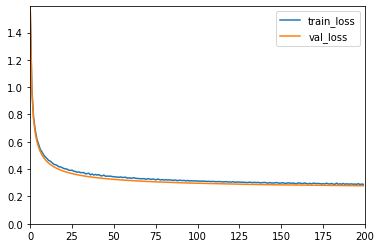

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), train_loss_his, label = "train_loss")
plt.plot(range(epochs), val_loss_his, label = "val_loss")

plt.axis([0, epochs, 0 , max(np.max(train_loss_his), np.max(train_loss_his))])

plt.legend()

plt.show()